In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

# Loading data

In [3]:
X = pickle.load(open("Data\X.pickle", "rb"))
y = pickle.load(open("Data\y.pickle", "rb"))

# Scaling pixels

In [4]:
import matplotlib.pyplot as plt
import random

Before scaling:


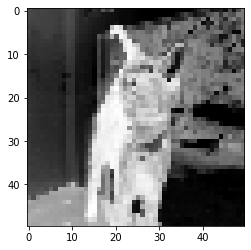

In [5]:
random_num = random.randint(0, len(X))
print("Before scaling:")
plt.imshow(X[random_num][:, :, 0], cmap=plt.cm.binary)

After scaling:


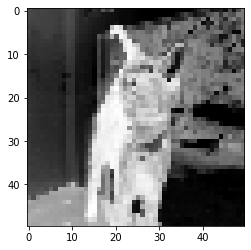

In [6]:
X = X/255
print("After scaling:")
plt.imshow(X[random_num][:, :, 0], cmap=plt.cm.binary)

# Building model

In [7]:
model = Sequential()

# Input layer
model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Hidden layer 1
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Hidden layer 2
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# Output layer
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Training

In [8]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 190s 8ms/step - loss: 0.5897 - acc: 0.6812 - val_loss: 0.5324 - val_acc: 0.7399
Epoch 2/10
22451/22451 [==============================] - 212s 9ms/step - loss: 0.5074 - acc: 0.7514 - val_loss: 0.4852 - val_acc: 0.7595
Epoch 3/10
22451/22451 [==============================] - 214s 10ms/step - loss: 0.4720 - acc: 0.7752 - val_loss: 0.4651 - val_acc: 0.7764
Epoch 4/10
22451/22451 [==============================] - 216s 10ms/step - loss: 0.4367 - acc: 0.7960 - val_loss: 0.4446 - val_acc: 0.7916
Epoch 5/10
22451/22451 [==============================] - 217s 10ms/step - loss: 0.4044 - acc: 0.8152 - val_loss: 0.4335 - val_acc: 0.7880
Epoch 6/10
22451/22451 [==============================] - 217s 10ms/step - loss: 0.3736 - acc: 0.8300 - val_loss: 0.4254 - val_acc: 0.8024
Epoch 7/10
22451/22451 [==============================] - 217s 10ms/step - loss: 0.3406 - acc: 0.8492 - val_loss: 0.496